### ***1️⃣ Import libraries:***

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score


### *2️⃣ Load dataset:*

In [9]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # adjust path as needed

### *3️⃣ EDA*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


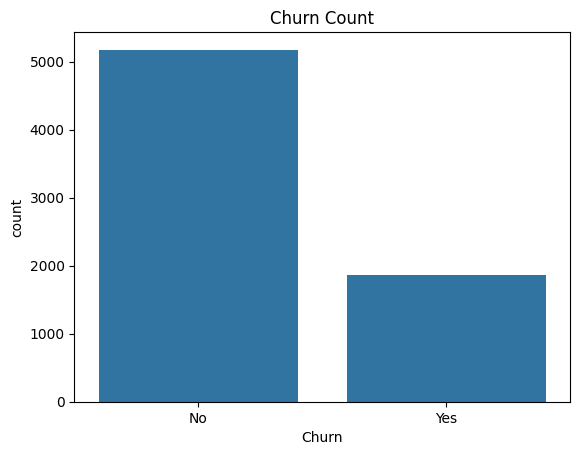

In [10]:
df.info()
df.describe()
df.isnull().sum()

sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()


### *4️⃣ Preprocess*

In [11]:
# Drop customerID
df = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


/tmp/ipython-input-11-2481053690.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### *5️⃣ Train-test split*

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### *6️⃣ Train model*

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.45      0.52       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Accuracy: 0.7835344215755855


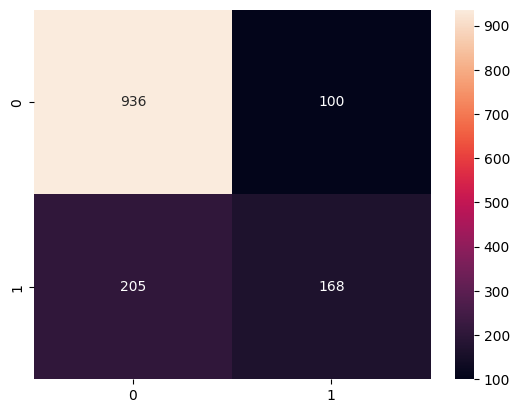

In [15]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
